<a href="https://colab.research.google.com/github/BrithneyHernandez25/BrithneyHernandez.github.io/blob/main/Tesis_graficos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

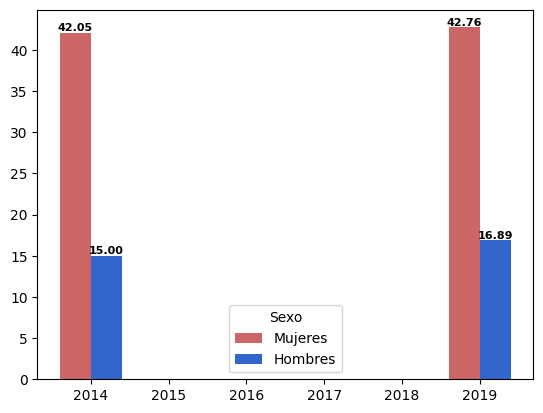

<Figure size 640x480 with 0 Axes>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties

datos=pd.read_excel("/content/Tiempo de trabajo no remunerado.xlsx")
datos=datos[(datos["grupos de edad__tiempo"]=="Total") & (datos["Tipos de trabajo"]=="Tiempo trabajo no remunerado")]
datos = datos.pivot_table(index="Años__ESTANDAR",columns="Sexo__población", values="value",fill_value=0)
bars=plt.bar(datos.index -0.2,datos["Mujeres"],label="Mujeres",width=0.4, color='#cc6666')
bars2=plt.bar(datos.index +0.2,datos["Hombres"],label="Hombres",width=0.4, color='#3366cc')

plt.bar_label(bars, fmt='%.2f', label_type='edge', color='black', fontsize=8,rotation=0,fontproperties=FontProperties(weight='bold'))
plt.bar_label(bars2, fmt='%.2f', label_type='edge', color='black', fontsize=8,rotation=0,fontproperties=FontProperties(weight='bold'))

plt.legend(title="Sexo")
plt.show()
plt.savefig("Imagen.jpg")

<ipython-input-30-555fe2d933c0>:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(electronica['Actividad económica'], rotation=90, ha='center', fontsize=8)


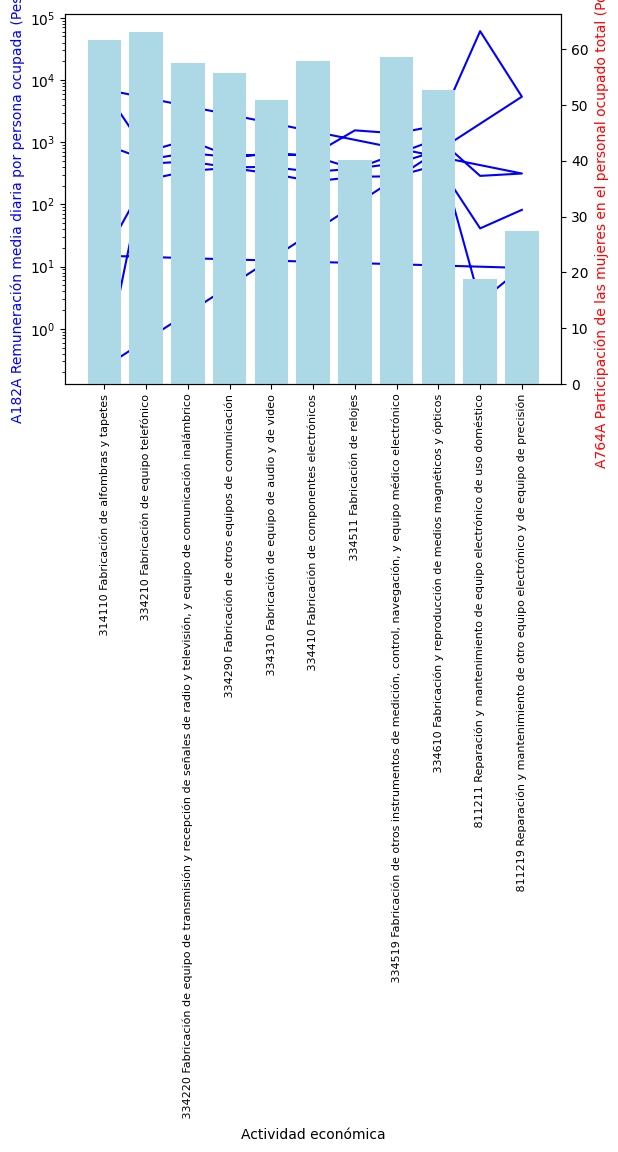

In [ ]:
from google.colab import auth
auth.authenticate_user()
import gspread
import pandas as pd
from google.auth import default
from datetime import datetime

creds, _ = default()
gc = gspread.authorize(creds)

# Define las URL de los archivos
urls = ["https://docs.google.com/spreadsheets/d/1aPzJ_nBqmxOfJxKViXhHSV_FPPMWR9cBPGscuRmrEOU/edit#gid=1085211620"] #NUESTRO

# Lista para almacenar los DataFrames de cada hoja de cálculo
dfs = []
for url in urls:
    doc_id = url.split("/")[5]
    print("Documento ID:", doc_id)
    doc = gc.open_by_key(doc_id)
    ws = doc.worksheet("datos")
    print("Hoja de cálculo:", ws.title)  # Agregado para imprimir el título de la hoja
    values = ws.get_all_values()
    df = pd.DataFrame(values[2:], columns=values[1])  # Tomamos la segunda fila como encabezados
    df.dropna(inplace=True)

    # Verificar si las columnas que queremos seleccionar existen en el DataFrame
    columnas_requeridas = [ 'Sexo', 'Actividad Económica','Headline','Sentiment',  'Número de ocupados', 'Remuneración']


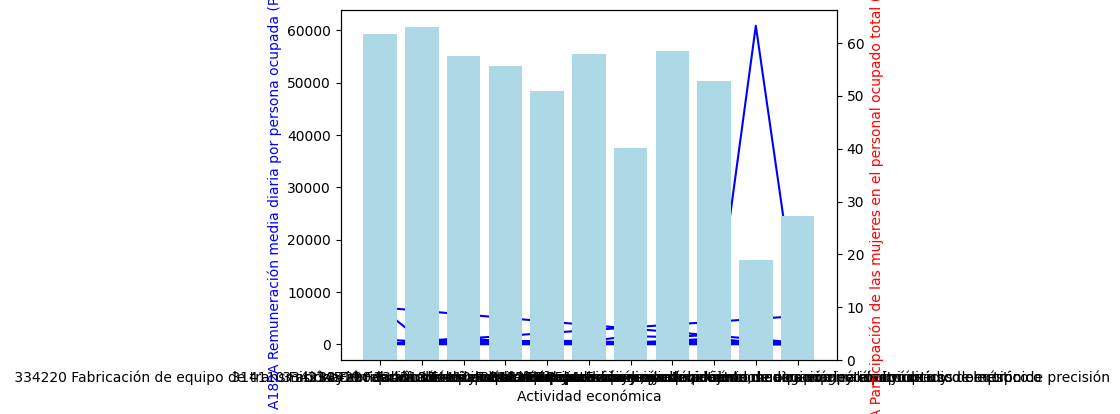

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar los datos
electronica = pd.read_csv("/content/Industria Electronica.csv")

# Convertir la columna 'Actividad económica' a cadena de texto
electronica['Actividad económica'] = electronica['Actividad económica'].astype(str)

# Graficar
fig, ax1 = plt.subplots()

# Graficar en línea
ax1.plot(electronica['Actividad económica'], electronica['A182A Remuneración media diaria por persona ocupada (Pesos)'], color='b')
ax1.set_xlabel('Actividad económica')
ax1.set_ylabel('A182A Remuneración media diaria por persona ocupada (Pesos)', color='b')

# Crear el segundo eje y para la gráfica de barras
ax2 = ax1.twinx()
ax2.bar(electronica['Actividad económica'], electronica['A764A Participación de las mujeres en el personal ocupado total (Porcentaje)'], color='lightblue') # Cambio de color
ax2.set_ylabel('A764A Participación de las mujeres en el personal ocupado total (Porcentaje)', color='r')

# Rotar las etiquetas del eje x y ajustar márgenes
plt.xticks(rotation=90, ha='right', va='center')
plt.subplots_adjust(bottom=0.15)

# Desactivar la escala logarítmica
ax1.set_yscale('linear')
ax2.set_yscale('linear')

plt.show()
